# A Brief PyTorch Tutorial for LM-class

This tutorial was prepared by Zizhao Chen (zc478@cornell.edu), and is a stripped down version of [Stanford's SP 24 CS224N PyTorch Tutorial](https://colab.research.google.com/drive/1Pz8b_h-W9zIBk1p2e6v-YFYThG1NkYeS?usp=sharing).

If you are using Colab, consider changing to a GPU runtime.

## Python: native features and common packages

In [9]:
# enumerate
data_mix = ["sst2", "newsgroups"]
for i, d in enumerate(data_mix):
    print(i, d)

for d in data_mix:
    print(d)

0 sst2
1 newsgroups
sst2
newsgroups


In [10]:
# list comprehension
data_paths = ["data/" + n for n in data_mix]
data_paths

out = []
for n in data_mix:
    out.append("data/" + n)
out

['data/sst2', 'data/newsgroups']

In [11]:
# dictionary comprehension
data_paths_dict = {n: "data/" + n for n in data_mix}
data_paths_dict

{'sst2': 'data/sst2', 'newsgroups': 'data/newsgroups'}

In [12]:
# functools (often used to define callbacks in trainer)
from functools import partial

def my_load_dataset(name, verbose):
  if verbose:
    print(f"trying to load {name}") # f-strings
  return name

my_load_dataset_verbose = partial(my_load_dataset, verbose=True)
_ = my_load_dataset_verbose("sst2")
_ = my_load_dataset_verbose("newsgroups")

trying to load sst2
trying to load newsgroups


In [13]:
# Counter - frequency dictionary
from collections import Counter

c = Counter("abcba")
c

Counter({'a': 2, 'b': 2, 'c': 1})

In [14]:
c = Counter([-1, -2])
c

Counter({-1: 1, -2: 1})

In [15]:
# defaultdict: avoids checking for key existance
from collections import defaultdict

d = defaultdict(int)
print(d)
d["abc"] += 1
d

defaultdict(<class 'int'>, {})


defaultdict(int, {'abc': 1})

In [16]:
d = dict()
d["abc"] += 1

KeyError: 'abc'

In [21]:
# tqdm: progress bars
import tqdm
import time

for i in tqdm.tqdm(range(10)):
    time.sleep(0.2)

100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


In [22]:
# logging
import logging
logging.basicConfig(level=logging.INFO)
logging.info("hello world")
logging.warning("this is a warning")
logging.error("this is an error")
logging.debug("this is a debug")

ERROR:root:this is an error


In [23]:
# argparse: tuning your learning rate without changing the code
# https://docs.python.org/3/howto/argparse.html#the-basics

In [24]:
# pandas: managing tables and IO
import pandas as pd
df = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})
df

,a,b
0,1,4
1,2,5
2,3,6


In [25]:
df["a"]

,a
0,1
1,2
2,3


In [26]:
df["a"].tolist()

[1, 2, 3]

In [27]:
df.to_csv("test.csv", index=False)
df2 = pd.read_csv("test.csv")
df2

,a,b
0,1,4
1,2,5
2,3,6


In [28]:
# numpy
import numpy as np
arr = np.array([1, 2, 3])
print(arr)
print(f"shape: {arr.shape}")
print(f"dtype: {arr.dtype}")

[1 2 3]
shape: (3,)
dtype: int64


In [29]:
arr * 3

array([3, 6, 9])

## Pytorch: tensor

In [30]:
# pytorch
import torch
arr = torch.tensor([1, 2, 3])
print(arr)
print(f"shape: {arr.shape}")
print(f"dtype: {arr.dtype}")

tensor([1, 2, 3])
shape: torch.Size([3])
dtype: torch.int64


In [31]:
# unlike numpy arrays, torch tensors can be placed on gpu/cpu devices
print(f"device: {arr.device}")
# arr = arr.to("cuda")
arr = arr.to("cpu")
arr = arr.cpu()

print(f"device: {arr.device}")

device: cpu
device: cpu


In [32]:
# handy constructors
print(f"{torch.arange(3)=}")
print(f"{torch.ones(3)=}")
print(f"{torch.zeros_like(arr)=}")

torch.arange(3)=tensor([0, 1, 2])
torch.ones(3)=tensor([1., 1., 1.])
torch.zeros_like(arr)=tensor([0, 0, 0])


Exercise: create a 2-by-3 tensor, filled with 1.0, and placed on cpu

In [33]:
torch.ones([2,3]).to("cpu")

tensor([[1., 1., 1.],
        [1., 1., 1.]])

### index

In [34]:
arr = torch.tensor([
    [0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9]])
print(f"{arr=}")

arr=tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [35]:
# select a single element
print(f"{arr[1]=}")
print(f"{arr[1][3]=}")
print(f"{arr[1, 3]=}")
print(f"{arr[(1, 3)]=}")
print(f"{arr[1, 3].item()}") # loss.item()

arr[1]=tensor([5, 6, 7, 8, 9])
arr[1][3]=tensor(8)
arr[1, 3]=tensor(8)
arr[(1, 3)]=tensor(8)
8


In [36]:
# select a group of element
print(f"{arr[1]=}")
print(f"{arr[1:]=}")
print(f"{arr[1:, 3:]=}")

arr[1]=tensor([5, 6, 7, 8, 9])
arr[1:]=tensor([[5, 6, 7, 8, 9]])
arr[1:, 3:]=tensor([[8, 9]])


Exercise: arr[???] yields tensor([2, 3])

In [37]:
arr[0, 2:4]

tensor([2, 3])

### shape

In [38]:
arr = torch.arange(10)
print(f"{arr.shape=}")
print(f"{arr.ndim=}")
print(f"{arr=}")

arr.shape=torch.Size([10])
arr.ndim=1
arr=tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [39]:
# reshape
arr = torch.arange(10)
print(f"before {arr.shape=}")
arr = arr.reshape(2, 5)
print(f"after {arr.shape=}")
print(f"{arr.ndim=}")
print(f"{arr=}")

before arr.shape=torch.Size([10])
after arr.shape=torch.Size([2, 5])
arr.ndim=2
arr=tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [40]:
# view
arr = torch.arange(10)
print(f"before {arr.shape=}")
arr = arr.view(2, 5)
# arr = arr.view(-1, 5)
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([10])
after arr.shape=torch.Size([2, 5])
arr=tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [41]:
# flatten
arr = torch.arange(10).view(-1, 5)
print(f"before {arr.shape=}")
arr = arr.flatten()
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([2, 5])
after arr.shape=torch.Size([10])
arr=tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [42]:
# unsqueeze
arr = torch.arange(10).view(-1, 5)
print(f"before {arr.shape=}")
arr = arr.unsqueeze(0)
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([2, 5])
after arr.shape=torch.Size([1, 2, 5])
arr=tensor([[[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]])


In [43]:
# squeeze
arr = torch.arange(10).view(-1, 5)
arr = arr.view(1, 1, 2, 5)
print(f"before {arr.shape=}")
arr = arr.squeeze()
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([1, 1, 2, 5])
after arr.shape=torch.Size([2, 5])
arr=tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [44]:
# unsqueeze by index with None
arr = torch.arange(10).view(-1, 5)
print(f"before {arr.shape=}")
arr = arr[torch.newaxis, :, :]
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([2, 5])
after arr.shape=torch.Size([1, 2, 5])
arr=tensor([[[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]])


In [45]:
# unsqueeze by index with None (a shortcut)
arr = torch.arange(10).view(-1, 5)
print(f"before {arr.shape=}")
arr = arr[None, :, :]
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([2, 5])
after arr.shape=torch.Size([1, 2, 5])
arr=tensor([[[0, 1, 2, 3, 4],
         [5, 6, 7, 8, 9]]])


In [46]:
# transpose. # necessary for attention
arr = torch.arange(10).view(-1, 5)
print(f"before {arr.shape=}")
arr = arr.transpose(0, 1)
print(f"after {arr.shape=}")
print(f"{arr=}")

before arr.shape=torch.Size([2, 5])
after arr.shape=torch.Size([5, 2])
arr=tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


Exercise: Create `tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])` from `torch.arange(12)`

In [47]:
a = torch.arange(12).reshape(3,4)
# a.transpose_(0,1)
print(a.shape)
a.transpose_(0,1)
print(a.shape)

torch.Size([3, 4])
torch.Size([4, 3])


### broadcast

In [48]:
# squeeze and unsqueeze are handy when it comes to broadcasting

In [49]:
arr1 = torch.arange(3, dtype=torch.float)
arr2 = torch.arange(4, dtype=torch.float)
print(f"{arr1=}")
print(f"{arr2=}")

arr1=tensor([0., 1., 2.])
arr2=tensor([0., 1., 2., 3.])


In [50]:
# compute the outter product of these two vectors
out = torch.zeros(3, 4)
for i in range(3):
    for j in range(4):
        out[i, j] = arr1[i] * arr2[j]
print(f"{out.shape=}")
print(f"{out=}")

out.shape=torch.Size([3, 4])
out=tensor([[0., 0., 0., 0.],
        [0., 1., 2., 3.],
        [0., 2., 4., 6.]])


In [51]:
# compute the outer product of these two vectors
out = arr1[:, None] * arr2[None, :]
print(f"{out.shape=}")
print(f"{out=}")

out.shape=torch.Size([3, 4])
out=tensor([[0., 0., 0., 0.],
        [0., 1., 2., 3.],
        [0., 2., 4., 6.]])


In [52]:
# compute the outer product of these two vectors
out = torch.outer(arr1, arr2)
print(f"{out.shape=}")
print(f"{out=}")

out.shape=torch.Size([3, 4])
out=tensor([[0., 0., 0., 0.],
        [0., 1., 2., 3.],
        [0., 2., 4., 6.]])


In [53]:
# compute the outer product of these two vectors
out = torch.matmul(arr1.view(3, 1), arr2.view(1, 4))
print(f"{out.shape=}")
print(f"{out=}")

out.shape=torch.Size([3, 4])
out=tensor([[0., 0., 0., 0.],
        [0., 1., 2., 3.],
        [0., 2., 4., 6.]])


In [54]:
# compute the outer product of these two vectors
out = arr1[:, None] @ arr2[None, :]
print(f"{out.shape=}")
print(f"{out=}")

out.shape=torch.Size([3, 4])
out=tensor([[0., 0., 0., 0.],
        [0., 1., 2., 3.],
        [0., 2., 4., 6.]])


Exercise: Inner product of two 3D vectors $b_{3}$ and $c_{3}$. All entries are ones. Multiple ways?

In [55]:
b = torch.ones(3)
c = torch.ones(3)

torch.dot(b,c)

tensor(3.)

In [56]:
torch.inner(b,c)

tensor(3.)

In [57]:
torch.matmul(b,c)

tensor(3.)

In [58]:
(b * c).sum()

tensor(3.)

Exercise: Implement matrix vector product $A_{5 \times 6} b_{6}$. All entries are ones.

In [59]:
pass

## Pytorch: layer and nn.Module

Exercise: implement a linear layer in pytorch

In [60]:
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.w = nn.Parameter(torch.randn(in_dim, out_dim))
        self.b = nn.Parameter(torch.zeros(out_dim))

    def forward(self, x):
        return x @ self.w + self.b

in_dim = 10
out_dim = 5
linear = MyLinear(in_dim, out_dim)
print(f"{linear.w.shape=}")
print(f"{linear.b.shape=}")
para_names = [n for n, _ in linear.named_parameters()]
print(f"{para_names=}")
batch_size = 33
x = torch.ones(batch_size, in_dim)
y = linear(x)
assert y.shape == (batch_size, out_dim)

linear.w.shape=torch.Size([10, 5])
linear.b.shape=torch.Size([5])
para_names=['w', 'b']


In [61]:
[(n, p.shape) for n, p in linear.named_parameters()]

[('w', torch.Size([10, 5])), ('b', torch.Size([5]))]

In [62]:
def prod(shape):
  a = 1
  for s in shape:
    a *= s
  return a

sum([prod(p.shape) for n, p in linear.named_parameters()])

55

In [63]:
# nn.Module are composable
class MyMultiLayer(nn.Module):

    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear1 = MyLinear(in_dim, out_dim)
        self.linear2 = MyLinear(out_dim, out_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x) + x
        return x

## Pytorch: functional, loss

In [64]:
import torch.nn.functional as F

In [65]:
# all sorts of common functions in nn.functional
F.cross_entropy(torch.randn(3, 5), torch.randint(0, 5, (3,)))
F.mse_loss(torch.randn(3, 5), torch.randn(3, 5))
F.binary_cross_entropy_with_logits(torch.randn(3, 5), torch.randn(3, 5))
F.softmax(torch.randn(3, 5), dim=-1)
F.relu(torch.randn(3, 5))

tensor([[1.3752, 2.4895, 0.3424, 0.0000, 0.0000],
        [1.0021, 0.4612, 1.0354, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8868, 0.0000, 0.0000]])

In [66]:
# their equivalent in nn
relu = nn.ReLU()
relu(torch.randn(3, 5))

tensor([[0.0000, 0.0000, 0.0000, 1.0948, 0.0000],
        [0.0000, 1.0112, 0.0000, 1.3606, 0.6699],
        [0.0000, 0.5092, 0.0000, 0.7903, 0.0000]])

## Pytorch: optim, autograd, dataloader, and the training loop

In [67]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# preparing dummy data
xs = torch.arange(10, dtype=torch.float).view(-1, 1)
torch.manual_seed(0)
ys = xs + 2.0 + torch.randn_like(xs)
dataset = TensorDataset(xs, ys)

# specify model, loss, and optimizer
model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# training loop
for epoch in tqdm.tqdm(range(10)):
    dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input) # forward pass
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        print(loss.item())
    val_acc = ...
    print(val_acc)

100%|██████████| 10/10 [00:00<00:00, 144.38it/s]

12.173014640808105
9.051483154296875
3.2841999530792236
Ellipsis
32.21067428588867
32.30604553222656
0.3255595862865448
Ellipsis
13.084419250488281
2.673468589782715
9.460314750671387
Ellipsis
2.2826690673828125
0.1342821568250656
13.310517311096191
Ellipsis
2.1652278900146484
4.1102705001831055
1.9986295700073242
Ellipsis
1.9268252849578857
2.248300075531006
2.882119655609131
Ellipsis
1.6307878494262695
3.948054552078247
3.0228021144866943
Ellipsis
1.831444501876831
2.718961477279663
0.3836958110332489
Ellipsis
5.594423770904541
9.708718299865723
0.2650377154350281
Ellipsis
2.4355788230895996
13.283886909484863
0.08634630590677261
Ellipsis


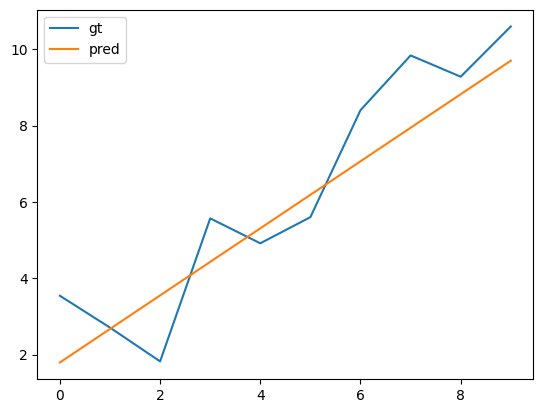

In [68]:
import matplotlib.pyplot as plt

plt.plot(xs.clone().detach().cpu().numpy(), ys.detach().numpy(), label="gt")
plt.plot(xs.detach().numpy(), model(xs).detach().numpy(), label="pred")
plt.legend()

Another look at how data is pipelined

In [69]:
from torch.utils.data import DataLoader, Dataset

# dataset handles IO from stream/online/disk...
class MyDataset(Dataset):
    def __init__(self, xs, ys):
        # or load from disk
        self.xs = xs
        self.ys = ys

    def __len__(self):
        return len(self.xs)

    # key method to write
    def __getitem__(self, idx):
      # preprocess
        return self.xs[idx], self.ys[idx]

# dataloader handles how each batch is delivered (lots of arguments) and on-the-fly preprocessing
dataloader = DataLoader(
    MyDataset(xs, ys),
    batch_size=4,
    shuffle=True,
    # num_workers=2,  # handy heavy preprocessing
    # collate_fn=None. # handy for dynamic padding
    )
for input, target in dataloader:
    print(input.shape, target.shape)


torch.Size([4, 1]) torch.Size([4, 1])
torch.Size([4, 1]) torch.Size([4, 1])
torch.Size([2, 1]) torch.Size([2, 1])


## Run an experiment

An experiment has lots of nitty-gritty besides defining the training loop, such as logging and monitoring.

- why: reproducibility, cross-run comparison, online tracking for extra long runs, debug observability, identify overfitting, early stopping
- what to save
  - configuration (dataset name, lr, feature names, even code version, ...)
  - model weights at each epoch
- what to log
  - train (mini-batch loss, gradient norm, isnan, accuracy, ...)
  - val (accuracy per epoch, sample prompt, ...)
  - other diagnostic stats (gpu usage, psutils cpu usage, ...)
- try [wandb](https://docs.wandb.ai/quickstart/) or [tensorboard](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html) for experiment tracking


## Case study: [minGPT](https://github.com/karpathy/minGPT)

Let's go through each of these files
- model.py
- trainer.py
- utils.py

## More resources
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://huggingface.co/docs/transformers/en/quicktour


## Extra fun

Identify the training loop in huggingface's Trainer: https://github.com/huggingface/transformers/blob/main/src/transformers/trainer.py

Then find these core components:
- create dataloaders
- the forward pass
- loss computation
- take the gradient step
- end-of-epoch validation

What other features does it have to support experiment running?